https://github.com/fchollet/keras/blob/master/examples/imdb_lstm.py

In [2]:
import utilities

In [81]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [82]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [84]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [86]:
utilities.print_weights_shape(model)

-------------
(20000, 128)
-------------
(128, 512)
(128, 512)
(512,)
-------------
(128, 1)
(1,)


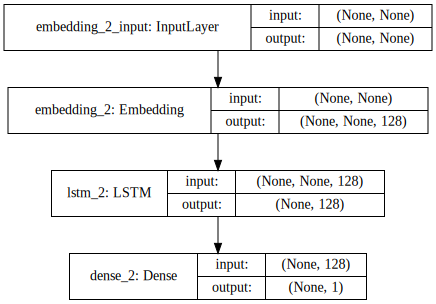

In [87]:
utilities.plot_keras_model(model)

In [88]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 88s 4ms/step - loss: 0.4671 - acc: 0.7774 - val_loss: 0.3856 - val_acc: 0.8315
Epoch 2/15
25000/25000 [==============================] - 86s 3ms/step - loss: 0.3068 - acc: 0.8744 - val_loss: 0.3701 - val_acc: 0.8361
Epoch 3/15
25000/25000 [==============================] - 85s 3ms/step - loss: 0.2186 - acc: 0.9139 - val_loss: 0.4138 - val_acc: 0.8291
Epoch 4/15
25000/25000 [==============================] - 85s 3ms/step - loss: 0.1502 - acc: 0.9448 - val_loss: 0.4869 - val_acc: 0.8297
Epoch 5/15
25000/25000 [==============================] - 85s 3ms/step - loss: 0.1087 - acc: 0.9608 - val_loss: 0.6374 - val_acc: 0.8227
Epoch 6/15
25000/25000 [==============================] - 86s 3ms/step - loss: 0.0799 - acc: 0.9717 - val_loss: 0.7185 - val_acc: 0.8217
Epoch 7/15
25000/25000 [==============================] - 86s 3ms/step - loss: 0.0570 - acc: 0.9793 - val_loss: 0.7389 